In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread, imshow, subplots, show
import numpy as np
import os
from PIL import Image

In [2]:
datagen = ImageDataGenerator(        
            rotation_range=45,        
            zoom_range=0.25,        
            horizontal_flip=True,         
            fill_mode='reflect')

In [5]:
i = 0
for batch in datagen.flow_from_directory(directory='Images/',
                                          batch_size=1,
                                          target_size=(224, 224),   
                                          color_mode="rgb",     
                                          save_to_dir='augmented',   
                                          save_prefix='aug',    
                                          save_format='jpg'):    
   i += 1    
   if i > 809:        
     break

Found 809 images belonging to 809 classes.


In [1]:
import os

In [2]:
images = os.listdir('./augmented')

In [3]:
images.sort()
images[10452]

'aug_9_9531318.jpg'

In [4]:
import cv2

In [ ]:
image_names = os.listdir('./Images')
image_names

In [ ]:
names_with_label = {}
for i in range(len(image_names)):
    names_with_label[image_names[i]] = i
names_with_label

In [ ]:
label_with_names = {}
for i in range(len(image_names)):
    label_with_names[i] = image_names[i]
label_with_names

In [10]:
X = []
root = './augmented'
for image in images:
    path = os.path.join(root,image)
    img = cv2.imread(path)
    img = cv2.resize(img,(120,120),3)
    X.append(img)
    

In [ ]:
X[0]

In [11]:
import numpy as np
X = np.array(X)
#y = np.array(y)
type(X)

numpy.ndarray

In [12]:
img_name_num = []
y = []
for i in range(len(images)):
    li = images[i].split('_')
    img_name_num.append(int(li[1]))
    y.append(int(li[1]))
y
y[10452]

9

In [ ]:
y

'dusknoir'

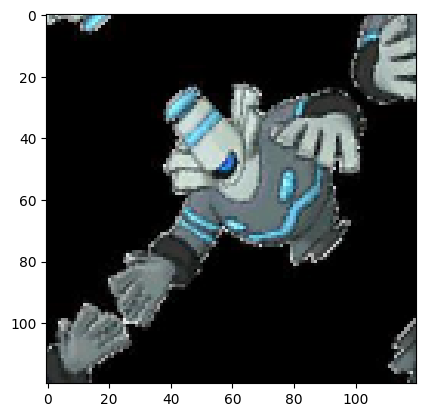

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X[1214])
label_with_names[y[1214]]

In [14]:
import PIL

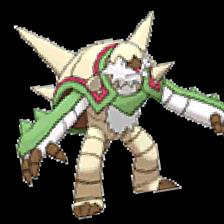

In [15]:
PIL.Image.open('./augmented/'+str(images[14]))

In [16]:
import sklearn

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=0)

In [18]:
len(X_train)

6794

In [19]:
print(len(X_train),len(y_train),len(X_test),len(y_test))

6794 6794 3659 3659


'brionne'

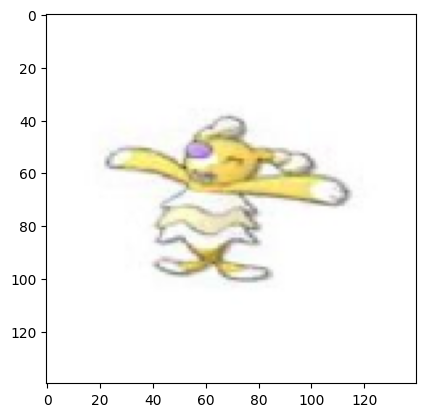

In [19]:
plt.imshow(X_train[145])
label_with_names[y_train[145]]

In [20]:
X_train.shape

(6794, 120, 120, 3)

In [21]:
X_train = X_train / 255
X_test = X_test / 255

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras.utils
from tensorflow.keras import layers

In [23]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D,BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications.mobilenet import MobileNet
from keras.models import Model

In [25]:
import tensorflow_hub as hub

In [27]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(120, 120, 3), include_top=False, weights='imagenet')
base_model.trainable = False
maxpool_layer = tf.keras.layers.GlobalMaxPooling2D()
prediction_layer = tf.keras.layers.Dense(809, activation='softmax')

model = tf.keras.Sequential([
    base_model,
    Dropout(0.2),
    maxpool_layer,
    Dropout(0.2),
    prediction_layer
])

In [28]:
y = np.array(y)
type(y)

numpy.ndarray

In [29]:
len(y_train)

6794

In [30]:
y_train = np.array(y_train)

In [31]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10


C:\Users\91901\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


213/213 [==============================] - 71s 308ms/step - loss: 5.9948 - acc: 0.3329
Epoch 2/10
213/213 [==============================] - 100s 470ms/step - loss: 0.6648 - acc: 0.8397
Epoch 3/10
213/213 [==============================] - 115s 540ms/step - loss: 0.2418 - acc: 0.9344
Epoch 4/10
213/213 [==============================] - 115s 542ms/step - loss: 0.1532 - acc: 0.9586
Epoch 5/10
213/213 [==============================] - 115s 540ms/step - loss: 0.1288 - acc: 0.9676
Epoch 6/10
213/213 [==============================] - 115s 539ms/step - loss: 0.1221 - acc: 0.9713
Epoch 7/10
213/213 [==============================] - 115s 540ms/step - loss: 0.1030 - acc: 0.9763
Epoch 8/10
213/213 [==============================] - 115s 539ms/step - loss: 0.1049 - acc: 0.9772
Epoch 9/10
213/213 [==============================] - 114s 537ms/step - loss: 0.1085 - acc: 0.9744
Epoch 10/10
213/213 [==============================] - 115s 542ms/step - loss: 0.1206 - acc: 0.9762


In [33]:
y_test = np.array(y_test)

In [34]:
model.evaluate(X_test,y_test)

115/115 [==============================] - 35s 283ms/step - loss: 0.6028 - acc: 0.8781


[0.6028478145599365, 0.87810879945755]

In [50]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


In [36]:
import matplotlib.image as mpimg

(1, 120, 120, 3)

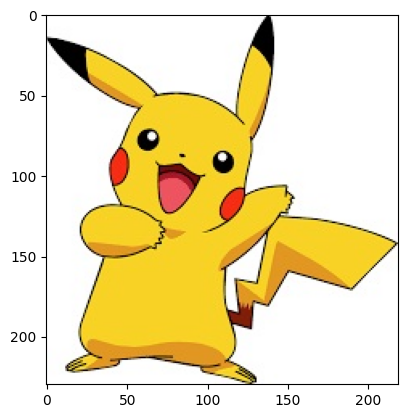

In [37]:
image1 = mpimg.imread("./download1.jpg")
plt.imshow(image1)
#plt.show()
image1 = cv2.resize(image1,(120,120),3)
pika1 = np.array(image1)/255.0
image1.shape
#pika1.shape
pika1[np.newaxis,...].shape

In [45]:
res1 = model.predict(pika1[np.newaxis,...])
predicted_label_index1 = np.argmax(res1)

1/1 [==============================] - 0s 31ms/step


In [47]:
res1[0][553]

0.9903475

In [53]:
label_with_names[y[553]]

'cubchoo'

1/1 [==============================] - 0s 285ms/step


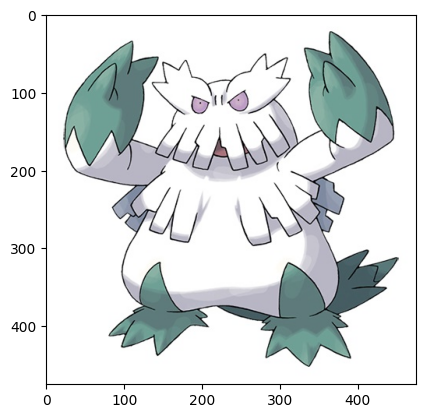

In [55]:
image2 = mpimg.imread("./abas.jpg")
plt.imshow(image2)
#plt.show()
image2 = cv2.resize(image1,(120,120),3)
abas = np.array(image2)/255.0
image2.shape
#pika1.shape
abas[np.newaxis,...].shape
res2 = model.predict(abas[np.newaxis,...])
predicted_label_index1 = np.argmax(res2)

In [56]:
predicted_label_index1

553

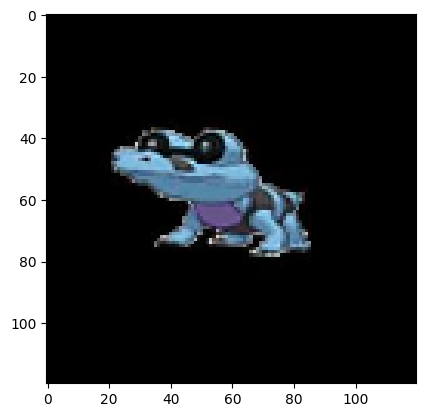

In [61]:
plt.imshow(X_train[120])

In [62]:
poke1 = X_train[120]
poke1.shape
poke1[np.newaxis,...].shape
res1 = model.predict(poke1[np.newaxis,...])
predicted_label_index1 = np.argmax(res1)
predicted_label_index1 

1/1 [==============================] - 0s 40ms/step


583

In [63]:
label_with_names[583]

'sandile'